# convert pleco dump to spreadsheet

In [1]:
#import xml file
import xml.etree.ElementTree as ET
import csv
tree = ET.parse('./Report.xml')
root = tree.getroot()
card_data = []
for card in root.findall(".//card"):
    card_datum = {}
    card_datum["created_stamp"] = card.get("created")
    card_datum["modified_stamp"] = card.get("modified")
    
    entry = card.find("./entry")
    card_datum["traditional"] = entry.find("./headword[@charset='tc']").text

    if entry.find("./cantopron") is None:
        continue
    card_datum["jyutping"] = entry.find("./cantopron").text
    
    if card.find("scoreinfo") is None:
        continue
    card_datum["correct"] = int(card.find("scoreinfo").get("correct"))
    card_datum["incorrect"] = int(card.find("scoreinfo").get("incorrect"))
    card_datum["difficulty"] = int(card.find("scoreinfo").get("difficulty"))
    card_datum["priority"] = card.find("scoreinfo").get("priority")
    card_datum["last_reviewed_stamp"] = int(card.find("scoreinfo").get("lastreviewedtime"))
    card_data.append(card_datum)
    
    

    
    
#convert xml to csv
import pandas as pd
cards_frame = pd.DataFrame(card_data)
for stamp in ["last_reviewed_stamp","created_stamp","modified_stamp"]:
    cards_frame[stamp] = pd.to_datetime(cards_frame[stamp],unit='s')
    
cards_frame.sort_values("created_stamp", ascending=False,inplace=True)
cards_frame.to_csv('./Report.csv', index = False)


# View 30 Most Recently Added Vocabs

In [2]:
#30 most recently added
cards_frame.sort_values("created_stamp", ascending=False).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
911,2021-09-27 18:47:29,2021-09-27 23:14:11,之前,zi1 cin4,1,0,100,None,2021-09-27 18:53:33
910,2021-09-27 18:46:57,2021-09-27 23:14:11,遲到,ci4 dou3,0,1,90,None,2021-09-27 18:53:43
909,2021-09-10 21:27:43,2021-09-27 23:14:11,練習,lin6 zaap6,0,1,90,None,2021-09-27 18:51:02
908,2021-09-10 21:26:30,2021-09-27 23:14:11,小朋友,siu2 pang4 jau5,1,0,100,None,2021-09-27 18:53:54
907,2021-09-10 21:26:08,2021-09-27 23:14:11,如果,jyu4 gwo2,1,0,100,None,2021-09-27 18:51:19
906,2021-09-10 21:23:27,2021-09-27 23:14:11,有時,jau5 si4,1,0,100,None,2021-09-27 18:54:49
905,2021-09-10 21:18:08,2021-09-27 23:14:11,州,zau1,0,1,90,None,2021-09-27 18:50:49
904,2021-09-10 21:16:36,2021-09-27 23:14:11,古典,gu2 din2,1,0,100,None,2021-09-27 18:54:24
903,2021-09-10 21:12:25,2021-09-27 23:14:11,一起,jat1 hei2,1,0,100,None,2021-09-27 18:54:38
902,2021-09-01 19:41:53,2021-09-01 19:44:38,不停,bat1 ting4,1,1,90,None,2021-09-09 21:16:39


# View 30 Most Recently Reviewed Vocabs

In [3]:
#30 most recently reviewed
cards_frame.sort_values("last_reviewed_stamp", ascending=False).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
579,2020-11-18 04:06:27,2021-09-27 23:14:11,粥,zuk1,1,0,100,None,2021-09-27 23:15:53
589,2020-11-18 04:39:36,2021-09-27 23:14:11,過嚟,gwo3 lai4,0,1,90,None,2021-09-27 23:15:42
593,2020-11-25 14:42:37,2021-09-27 23:14:11,滿意,mun5 ji3,1,0,100,None,2021-09-27 23:15:01
582,2020-11-18 04:10:09,2021-09-27 23:14:11,單身,daan1 san1,1,0,100,None,2021-09-27 23:14:36
906,2021-09-10 21:23:27,2021-09-27 23:14:11,有時,jau5 si4,1,0,100,None,2021-09-27 18:54:49
903,2021-09-10 21:12:25,2021-09-27 23:14:11,一起,jat1 hei2,1,0,100,None,2021-09-27 18:54:38
904,2021-09-10 21:16:36,2021-09-27 23:14:11,古典,gu2 din2,1,0,100,None,2021-09-27 18:54:24
908,2021-09-10 21:26:30,2021-09-27 23:14:11,小朋友,siu2 pang4 jau5,1,0,100,None,2021-09-27 18:53:54
910,2021-09-27 18:46:57,2021-09-27 23:14:11,遲到,ci4 dou3,0,1,90,None,2021-09-27 18:53:43
911,2021-09-27 18:47:29,2021-09-27 23:14:11,之前,zi1 cin4,1,0,100,None,2021-09-27 18:53:33


# View 30 Random Vocabs

In [4]:
#30 random words
cards_frame.sample(frac=1).head(30)

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
8,2020-01-10 03:23:49,2021-07-23 16:14:07,上面,soeng6 min6,17,18,50,None,2021-04-13 21:00:24
488,2020-09-28 17:24:37,2021-08-03 12:55:06,信封,seon3 fung1,0,1,90,low,2021-08-08 22:19:42
294,2020-05-22 19:35:57,2021-07-23 16:14:07,電影,din6 jing2,6,8,76,None,2021-03-26 14:58:17
177,2020-04-15 20:04:36,2021-07-23 16:14:07,洋蔥,joeng4 cung1,14,18,50,None,2021-03-21 01:00:40
608,2020-12-09 17:27:40,2021-07-23 16:14:07,好耐冇見,hou2 noi6 mou5 gin3,6,13,50,high,2021-09-09 22:42:01
432,2020-07-29 19:54:20,2021-07-23 16:14:07,渣打銀行,Zaa1 daa2 ngan4 hong4,4,2,88,None,2020-12-02 13:19:00
165,2020-04-11 03:12:09,2021-07-23 16:14:07,了哥,liu1 go1,7,22,50,low,2021-04-11 16:53:54
305,2020-05-22 19:53:37,2021-07-23 16:14:07,便當,bin6 dong3,6,19,50,None,2021-04-13 21:00:02
395,2020-06-22 13:31:55,2021-07-23 16:14:07,扮,baan6,5,7,68,None,2021-03-24 22:30:02
749,2021-03-09 20:19:26,2021-07-23 16:14:07,搬屋,bun1 uk1,3,1,90,None,2021-03-26 15:03:35


# Cell Reserved for Searching

In [5]:
cards_frame[cards_frame.traditional.str.contains('一')]

,created_stamp,modified_stamp,traditional,jyutping,correct,incorrect,difficulty,priority,last_reviewed_stamp
903,2021-09-10 21:12:25,2021-09-27 23:14:11,一起,jat1 hei2,1,0,100,None,2021-09-27 18:54:38
901,2021-09-01 19:32:38,2021-09-01 19:44:38,一鑊熟,jat1 wok6 suk6,1,1,90,None,2021-09-09 21:34:02
896,2021-09-01 19:29:19,2021-09-01 19:44:38,一天都光晒,jat1 tin1 dou1 gwong1 saai3,1,0,100,None,2021-09-05 15:09:00
824,2021-05-03 22:22:57,2021-07-23 16:14:07,等一陣,dang2 jat1 zan6,2,1,90,None,2021-06-08 16:50:24
822,2021-05-03 22:22:01,2021-07-23 16:14:07,一陣,jat1 zan6,0,2,90,None,2021-06-08 16:45:12
810,2021-04-26 21:10:09,2021-07-23 16:14:07,一半,jat1 bun3,2,3,80,None,2021-05-27 19:26:27
808,2021-04-26 21:04:21,2021-07-23 16:14:07,郁咗一郁,juk1 zo2 jat1 juk1,2,1,90,None,2021-05-24 16:44:35
748,2021-03-09 19:29:35,2021-07-23 16:14:07,一下,jat1 haa6,0,0,100,None,2021-03-09 19:42:22
710,2021-02-09 21:04:08,2021-07-23 16:14:07,一條褲,jat1 tiu4 fu3,0,0,100,None,2021-02-12 23:17:27
667,2021-01-20 17:04:19,2021-07-23 16:14:07,一直,jat1 zik6,2,1,90,None,2021-02-09 16:09:10


# Weekly Review Stats

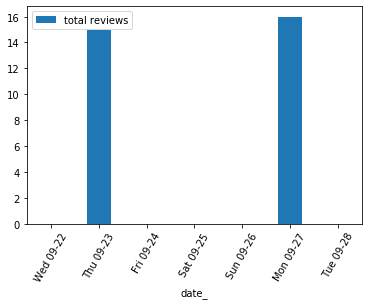

In [6]:
import datetime



today = pd.to_datetime("today").round('1d')
week_range = pd.date_range(today-pd.Timedelta(days=6),today,freq='d')
date2count ={"date":week_range,"total reviews":[0]*7,"date_":[x.strftime('%a %m-%d') for x in week_range]}
for card_stamp in cards_frame["last_reviewed_stamp"]:
    for day_of_week in week_range:
        if day_of_week < card_stamp < day_of_week+pd.Timedelta(days=1):
            date2count["total reviews"][list(week_range).index(day_of_week)] += 1
            break
            

            
            

datesframe = pd.DataFrame(date2count)


datesframe.plot.bar(x='date_', y='total reviews', rot=60)
